In [111]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [177]:
import pandas as pd
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Data Preparation

In [178]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [179]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [180]:
# changing the column type of totalcharges from object to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [182]:
# finding the missing values in TotalCharges column
data[data.isnull().any(axis=1)]  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [183]:
# filling the missing values with zeros in TotalCharges column
data['TotalCharges'] = data['TotalCharges'].fillna(0)

## 1a. Categorical and Numerical Columns

In [184]:
# seperate categorical and numerical columns
custid = ['customerID']
target = ['Churn']

# seperate categorical and numerical column names as lists
categorical = data.columns[data.dtypes == 'object'].tolist()
categorical.remove(target[0])
categorical.remove(custid[0])
#numerical = [col for col in data.columns if col not in custid + categorical + target]
numerical = data.columns[data.dtypes != 'object'].tolist()

### One-Hot Encoding categorical variables

In [185]:
#One-Hot coding categorical variables
df = pd.get_dummies(data = data, columns = categorical, drop_first = True)

### Scaling the numerical variables

In [186]:
# import StandardScaler Library
from sklearn.preprocessing import StandardScaler
# intialize StandardScaler instance
scaler = StandardScaler()
# fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(data[numerical])
# build a dataframe
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical)

In [187]:
# drop non scaled numerical columns
df = df.drop(columns = numerical, axis=1)
# merge the non-numerical with the scaled numerical
telcom = df.merge(right = scaled_numerical, how ='left', left_index=True, right_index=True)

In [188]:
telcom.head()

,customerID,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.439916,-1.277445,-1.160323,-0.992611
1,5575-GNVDE,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,-0.439916,0.066327,-0.259629,-0.172165
2,3668-QPYBK,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.439916,-1.236724,-0.362660,-0.958066
3,7795-CFOCW,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,-0.439916,0.514251,-0.746535,-0.193672
4,9237-HQITU,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.439916,-1.236724,0.197365,-0.938874


# 2. Machine Learning

In [189]:
# churn distribution
telcom['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [190]:
# churn distribution in percentage
telcom.groupby(['Churn']).size() / telcom.shape[0] *100

Churn
No     73.463013
Yes    26.536987
dtype: float64

## 2a. Logistic Regression

In [191]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(telcom, test_size = 0.25)

In [192]:
target = ['Churn']
custid = ['customerID']
cols = [col for col in telcom.columns if col not in target + custid]

In [193]:
train_X = train[cols]
train_Y = train[target]
test_X = test[cols]
test_Y = test[target]

In [194]:
# importing the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# initialzing the classifier instance
logreg = LogisticRegression(max_iter=1500)
# fitting the model on the training data
logreg.fit(train_X, train_Y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
# importing the accuracy metric
from sklearn.metrics import accuracy_score
# making predictions on train_X
pred_train_Y = logreg.predict(train_X)
# making predictions on test_X
pred_test_Y = logreg.predict(test_X)
# accuracy scores
train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)
print("Training accuracy: ", round(train_accuracy, 4))
print("Test accuracy: ", round(test_accuracy, 4))

Training accuracy:  0.805
Test accuracy:  0.8064


In [196]:
# importing the precision and recall metrics
from sklearn.metrics import precision_score, recall_score
# precision scores on training and test data
train_precision = round(precision_score(train_Y, pred_train_Y, pos_label="No"),4)
test_precision = round(precision_score(test_Y, pred_test_Y, pos_label="No"),4)
# recall scores on training and test data
train_recall = round(recall_score(train_Y, pred_train_Y, pos_label="No"),4)
test_recall = round(recall_score(test_Y, pred_test_Y, pos_label="No"),4)
print(f"Training precision: {train_precision}, Training recall: {train_recall}" )
print(f"Test precision: {test_precision}, Test recall: {test_recall}" )

Training precision: 0.8453, Training recall: 0.8997
Test precision: 0.8578, Test recall: 0.8811


In [197]:
import numpy as np

# choosing an optimal C value, (C=1 by default)
C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]
# creating an array
l1_metrics = np.zeros((len(C), 5))
# making the first column equal to C
l1_metrics[:, 0] = C
for idx in range(0, len(C)):
  logreg = LogisticRegression(penalty='l1', C = C[idx], solver='liblinear')
  logreg.fit(train_X, train_Y.values.ravel())
  pred_test_Y = logreg.predict(test_X)
  l1_metrics[idx, 1] = np.count_nonzero(logreg.coef_)
  l1_metrics[idx, 2] = accuracy_score(test_Y, pred_test_Y)
  l1_metrics[idx, 3] = precision_score(test_Y, pred_test_Y, pos_label="No")
  l1_metrics[idx, 4] = recall_score(test_Y, pred_test_Y, pos_label="No")
col_names = ['C', 'Non-Zero Coeffs', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(l1_metrics, columns = col_names))

        C  Non-Zero Coeffs  Accuracy  Precision    Recall
0  1.0000             26.0  0.805792   0.856604  0.881896
1  0.5000             26.0  0.806360   0.856712  0.882673
2  0.2500             23.0  0.807496   0.856928  0.884227
3  0.1000             19.0  0.809199   0.856714  0.887335
4  0.0500             15.0  0.808064   0.851742  0.892774
5  0.0250             13.0  0.808631   0.848240  0.898990
6  0.0100              9.0  0.801249   0.827852  0.919192
7  0.0050              4.0  0.795003   0.807029  0.945610
8  0.0025              2.0  0.730835   0.731360  0.998446


## 2b. Decision Tree

In [198]:
# import the decision tree model
from sklearn.tree import DecisionTreeClassifier
# choosing the optimal depth
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list
for idx in range(len(depth_list)):
  mytree = DecisionTreeClassifier(max_depth=depth_list[idx])
  mytree.fit(train_X, train_Y)
  pred_test_Y = mytree.predict(test_X)
  depth_tuning[idx, 1] = accuracy_score(test_Y, pred_test_Y)
  depth_tuning[idx, 2] = precision_score(test_Y, pred_test_Y, pos_label="No")
  depth_tuning[idx, 3] = recall_score(test_Y, pred_test_Y, pos_label="No")
col_names = ['Max_depth', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(depth_tuning, columns= col_names))

    Max_depth  Accuracy  Precision    Recall
0         2.0  0.797274   0.824721  0.917638
1         3.0  0.797274   0.824721  0.917638
2         4.0  0.792164   0.812627  0.930070
3         5.0  0.796139   0.833333  0.901321
4         6.0  0.789324   0.830925  0.893551
5         7.0  0.784214   0.829339  0.887335
6         8.0  0.787053   0.829004  0.892774
7         9.0  0.781374   0.831131  0.879565
8        10.0  0.771153   0.825959  0.870241
9        11.0  0.750142   0.821564  0.840715
10       12.0  0.737649   0.818042  0.824398
11       13.0  0.746735   0.826729  0.826729
12       14.0  0.736513   0.816295  0.825175


Optimal depth is 5.

In [199]:
# initialize the classifier
mytree = DecisionTreeClassifier(max_depth = 5)
# fit the model on the training data
mytree.fit(train_X, train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [200]:
# measuring model accuracy
# importing the accuracy metric
from sklearn.metrics import accuracy_score
# making predictions on train_X
pred_train_Y = mytree.predict(train_X)
# making predictions on test_X
pred_test_Y = mytree.predict(test_X)
# accuracy scores
train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)
print("Training accuracy: ", round(train_accuracy, 4))
print("Test accuracy: ", round(test_accuracy, 4))

Training accuracy:  0.7976
Test accuracy:  0.7961


In [201]:
# measuring precision and recall
# importing the precision and recall metrics
from sklearn.metrics import precision_score, recall_score
# precision scores on training and test data
train_precision = round(precision_score(train_Y, pred_train_Y, pos_label="No"),4)
test_precision = round(precision_score(test_Y, pred_test_Y, pos_label="No"),4)
# recall scores on training and test data
train_recall = round(recall_score(train_Y, pred_train_Y, pos_label="No"),4)
test_recall = round(recall_score(test_Y, pred_test_Y, pos_label="No"),4)
print(f"Training precision: {train_precision}, Training recall: {train_recall}" )
print(f"Test precision: {test_precision}, Test recall: {test_recall}" )

Training precision: 0.8291, Training recall: 0.9133
Test precision: 0.8333, Test recall: 0.9013


# 3. Identify and interpret churn drivers

## 3a. Plotting decision tree rules

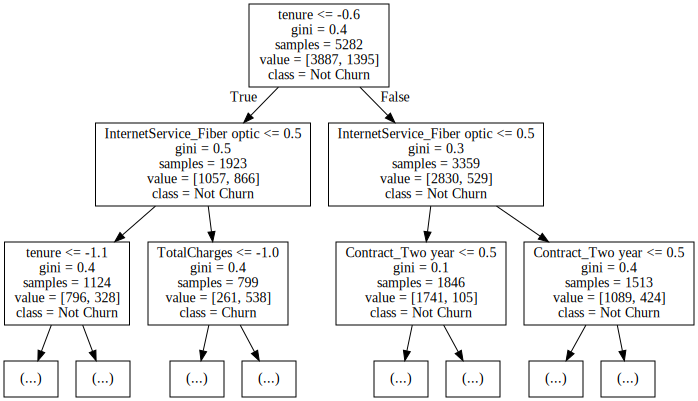

In [202]:
# decision tree can be displayed using the code below
# the graph is too large, so I set the max_depth=2 to examine the top layer of the tree.
from sklearn import tree
import graphviz
exported = tree.export_graphviz(decision_tree = mytree, feature_names = cols, max_depth= 2, precision = 1, class_names = ['Not Churn', 'Churn'])
graph = graphviz.Source(exported)
display(graph)

Customer tenure is the most important variable. If the tenure is less than -0.6(in the scaled data) and the customer has no fiber optic internet service, then it is very likely that the customer will churn.

## 3b. Logistic Regression coefficients

In [203]:
# to interpret the coefficients, we calculate the exponents of the coefficients
# this gives us the change in odds ratio associated with 1 unit increase in the feature

coefs = pd.concat([pd.DataFrame(train_X.columns), pd.DataFrame(np.transpose(logreg.coef_))], axis=1)
coefs.columns = ['Feature', 'Coefficient']
coefs['Exp_Coef'] = np.exp(coefs['Coefficient'])
coefs  = coefs[coefs['Coefficient'] !=0]
print(coefs.sort_values(by=['Coefficient']))

           Feature  Coefficient  Exp_Coef
27          tenure    -0.398976  0.671007
28  MonthlyCharges     0.143528  1.154339


The coefficient with the largest effect on the odds of churning is tenure which is consistent with the decision tree model.
Values less than 1(exp_coef) decrease the odds, values more than 1 increase the odds. So the effect of 1 additional year of tenure, decreases the odds of churn 34% (1 - 0.66 = 0.34). 